# Machine Learning and Computer Vision
## Assigment 4

---

This assignment contains 2 programming exercises.


## Problem 1: Canny Edge Detection

In this problem, you are required to write a function that performs Canny Edge Detection1. The function has the following specifications:

• It takes in two inputs: a grayscale image (geisel.jpg), and a threshold te. 

• It returns the edge image.

• You are allowed the use of loops.


A brief description of the algorithm is given below. Make sure your function reproduces each step as given.

(i) Smoothing: 

It is inevitable that all images taken from a camera will contain some amount of noise. To prevent noise from being mistaken for edges, noise must be reduced. Therefore the image is first smoothed by applying a Gaussian filter. A Gaussian kernel with standard deviation σ = 1.4 (shown below) is to be used. 

You can perform this filtering step by using the scipy.signal.convolve2d( ) function.
<img src="markdown/fig1.png">

(ii) Finding Gradients: 

The next step is to find the horizontal and vertical gradients of the smoothed image using the Sobel operators. The gradient images in the x and y-direction, Gx and Gy are found by applying the kernels kx and ky given below. 
These operations can be performed using scipy.signal.convolve2d() in the same manner as before.
<img src="markdown/fig2.png">

The corresponding gradient magnitude image is computed using:
<img src="markdown/fig3.png">

and the edge direction image is calculated as follows:
<img src="markdown/fig4.png">

(iii) Non-maximum Suppression (NMS): 

The purpose of this step is to convert the thick edges in the gradient magnitude image to ”sharp” edges. This is done by preserving all local maxima in the gradient image, and deleting everything else. This is carried out by recursively performing the following steps for each pixel in the gradient image:

• Round the gradient direction θ to nearest 45◦, corresponding to the use of an 8-connected neighbourhood.

• Compare the edge strength of the current pixel with the edge strength of the pixel in the positive and negative gradient direction i.e. if the gradient direction is north (θ = 90◦), then compare with the pixels to the north and south.

• If the edge strength of the current pixel is largest; preserve the value of the edge strength. If not, suppress (remove) the value.

(iv) Thresholding: 

The edge-pixels remaining after the NMS step are (still) marked with their strength. Many of these will probably be true edges in the image, but some may be caused by noise or color variations. The simplest way to remove these would be to use a threshold, so that only edges stronger than a certain value would be preserved. Use the input te to perform thresholding on the non-maximum suppressed magnitude image.

Evaluate your canny edge detection function on geisel.jpg for a suitable value of te that retains the structural edges, and removes the noisy ones.

Things to turn in:

• Image after smoothing, the original gradient magnitude image, the image after NMS, and the final edge image after thresholding.

• The value for te that you used to produce the final edge image.

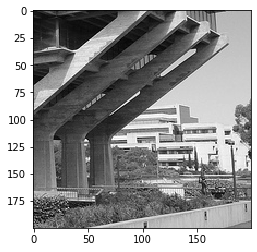

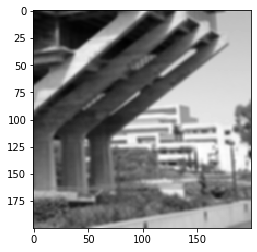

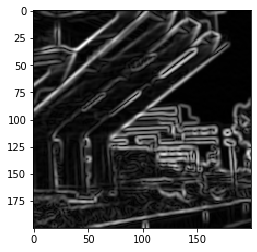

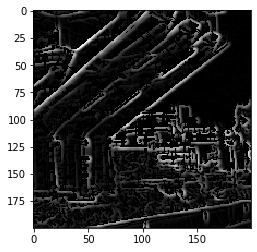

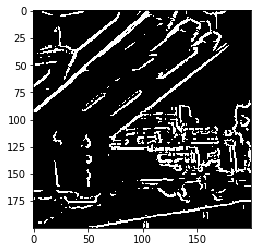

threshold = 120


In [10]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from scipy import signal
def rgb2gray(rgb):
    grayimg = rgb[:,:,0] * 0.299 + rgb[:,:,1] * 0.587 + rgb[:,:,2] * 0.114
    return grayimg

#Canny Edge Detection Function
def canny_edge(img, te):
    k = 1/159 * np.array([[2,4,5,4,2],
                          [4,9,12,9,4],
                          [5,12,15,12,5],
                          [4,9,12,9,4],
                          [2,4,5,4,2]])
    smothing = signal.convolve2d(img, k, boundary='symm', mode='same')
    
    kx = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])
    ky = kx.T
    gx = signal.convolve2d(smothing, kx, boundary='symm', mode='same')
    gy = signal.convolve2d(smothing, ky, boundary='symm', mode='same')
    
    g = np.sqrt(gx*gx + gy*gy)
#     theta_round = np.arctan(gy/gx)
#     theta_round = np.round(theta_round*180/np.pi)
#     h, w = g.shape
#     mag = g.copy()

#     for i in range(1,h-1):
#         for j in range(1,w-1):
#             if theta_round[i,j] == 0 or theta_round[i,j] == 180 or theta_round[i,j] == -180:
#                 if mag[i,j] <= mag[i,j-1]or mag[i,j]<= mag[i,j+1]:
#                     mag[i,j] = 0;
#             elif theta_round[i,j] == 45 or theta_round[i,j] == -135:
#                 if mag[i,j] <= mag[i-1,j+1] or mag[i,j]<= mag[i+1,j+1]:
#                     mag[i,j] = 0;
#             elif theta_round[i,j] == -45 or theta_round[i,j] == 135:
#                 if mag[i,j] <= mag[i+1,j+1]or mag[i,j]<= mag[i-1,j-1]:
#                     mag[i,j] = 0;
#             elif theta_round[i,j] == 90 or theta_round[i,j] == -90:
#                 if mag[i,j] <= mag[i-1,j]or mag[i,j]<= mag[i+1,j]:
#                     mag[i,j] = 0;  
    gdir = np.arctan(gy/gx)
    gdir = np.round(gdir*4/np.pi)+3
    gg = np.copy(g)
    for i in range(g.shape[0]):
        for j in range(g.shape[1]):
            p, q = i, j
#               north
            while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and (gdir[p, q] == 5 or gdir[p, q] == 1):
                if g[p, q]>gg[i, j]:
                    gg[i,j]=0
                p, q = p+1, q
#                 south
            while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and (gdir[p, q] == 1 or gdir[p, q] == 5):
                if g[p, q]>gg[i, j]:
                    gg[i,j]=0
                p, q = p-1, q                
#             east
            while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 3:
                if g[p, q]>gg[i, j]:
                    gg[i,j]=0
                p, q = p, q+1
#                 west
            while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 3:
                if g[p, q]>gg[i, j]:
                    gg[i,j]=0
                p, q = p, q-1
#             northeast
            while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 4:
                if g[p, q]>gg[i, j]:
                    gg[i,j]=0
                p, q = p+1, q+1                
#                 southwest
            while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 4:
                if g[p, q]>gg[i, j]:
                    gg[i,j]=0
                p, q = p-1, q-1
#             southeast
            while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 2:
                if g[p, q]>gg[i, j]:
                    gg[i,j]=0
                p, q = p-1, q+1 
#                 northwest
            while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 2:
                if g[p, q]>gg[i, j]:
                    gg[i,j]=0
                p, q = p-1, q+1
        detected_img = np.copy(gg)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):   
                if gg[i, j] > te:
                    detected_img[i, j] = 1
                else:
                    detected_img[i, j] = 0
    return smothing, g, gg, detected_img
#     return gdir
#     return detected_img

#Import image here
im = imread('geisel.jpg')
te = 120
grayim = rgb2gray(im[200:400, 400:600])
plt.imshow(grayim, cmap='gray')

smothingim, g, gg, detected_img = canny_edge(grayim, te)
plt.figure()
plt.imshow(smothingim, cmap='gray')
plt.figure()
plt.imshow(g, cmap='gray')
plt.figure()
plt.imshow(gg, cmap='gray')
plt.figure()
plt.imshow(detected_img, cmap='gray')
plt.show()
print('threshold = %d' %te)

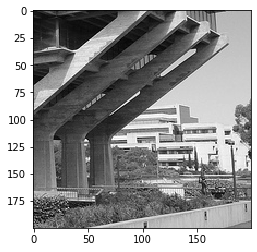

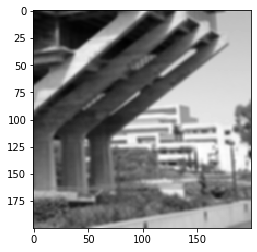

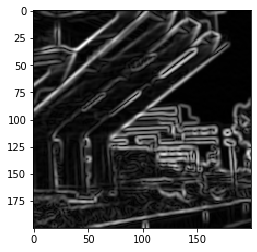

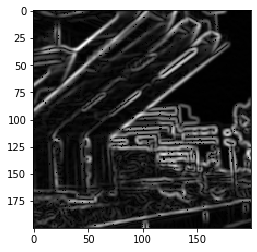

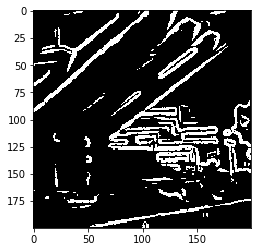

threshold = 150


In [14]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from scipy import signal
def rgb2gray(rgb):
    grayimg = rgb[:,:,0] * 0.299 + rgb[:,:,1] * 0.587 + rgb[:,:,2] * 0.114
    return grayimg

#Canny Edge Detection Function
def canny_edge(img, te):
    k = 1/159 * np.array([[2,4,5,4,2],
                          [4,9,12,9,4],
                          [5,12,15,12,5],
                          [4,9,12,9,4],
                          [2,4,5,4,2]])
    smothing = signal.convolve2d(img, k, boundary='symm', mode='same')
    
    kx = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])
    ky = kx.T
    gx = signal.convolve2d(smothing, kx, boundary='symm', mode='same')
    gy = signal.convolve2d(smothing, ky, boundary='symm', mode='same')
    
    g = np.sqrt(gx*gx + gy*gy)
    theta_round = np.arctan(gy/gx)
    theta_round = np.round(theta_round*180/np.pi)
    h, w = g.shape
    mag = g.copy()

    for i in range(1,h-1):
        for j in range(1,w-1):
            if theta_round[i,j] == 0 or theta_round[i,j] == 180 or theta_round[i,j] == -180:
                if mag[i,j] <= mag[i,j-1]or mag[i,j]<= mag[i,j+1]:
                    mag[i,j] = 0;
            elif theta_round[i,j] == 45 or theta_round[i,j] == -135:
                if mag[i,j] <= mag[i-1,j+1] or mag[i,j]<= mag[i+1,j+1]:
                    mag[i,j] = 0;
            elif theta_round[i,j] == -45 or theta_round[i,j] == 135:
                if mag[i,j] <= mag[i+1,j+1]or mag[i,j]<= mag[i-1,j-1]:
                    mag[i,j] = 0;
            elif theta_round[i,j] == 90 or theta_round[i,j] == -90:
                if mag[i,j] <= mag[i-1,j]or mag[i,j]<= mag[i+1,j]:
                    mag[i,j] = 0;  
#     gdir = np.arctan(gy/gx)
#     gdir = np.round(gdir*4/np.pi)+3
#     gg = np.copy(g)
#     for i in range(g.shape[0]):
#         for j in range(g.shape[1]):
#             p, q = i, j
# #               north
#             while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and (gdir[p, q] == 5 or gdir[p, q] == 1):
#                 if g[p, q]>gg[i, j]:
#                     gg[i,j]=0
#                 p, q = p+1, q
# #                 south
#             while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and (gdir[p, q] == 1 or gdir[p, q] == 5):
#                 if g[p, q]>gg[i, j]:
#                     gg[i,j]=0
#                 p, q = p-1, q                
# #             east
#             while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 3:
#                 if g[p, q]>gg[i, j]:
#                     gg[i,j]=0
#                 p, q = p, q+1
# #                 west
#             while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 3:
#                 if g[p, q]>gg[i, j]:
#                     gg[i,j]=0
#                 p, q = p, q-1
# #             northeast
#             while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 4:
#                 if g[p, q]>gg[i, j]:
#                     gg[i,j]=0
#                 p, q = p+1, q+1                
# #                 southwest
#             while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 4:
#                 if g[p, q]>gg[i, j]:
#                     gg[i,j]=0
#                 p, q = p-1, q-1
# #             southeast
#             while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 2:
#                 if g[p, q]>gg[i, j]:
#                     gg[i,j]=0
#                 p, q = p-1, q+1 
# #                 northwest
#             while p >= 0 and p <g.shape[0] and q >=0 and q < g.shape[1] and gdir[p, q] == 2:
#                 if g[p, q]>gg[i, j]:
#                     gg[i,j]=0
#                 p, q = p-1, q+1
        detected_img = np.copy(mag)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):   
                if mag[i, j] > te:
                    detected_img[i, j] = 1
                else:
                    detected_img[i, j] = 0
    return smothing, g, mag, detected_img
#     return gdir
#     return detected_img

#Import image here
im = imread('geisel.jpg')
te = 150
grayim = rgb2gray(im[200:400, 400:600])
plt.imshow(grayim, cmap='gray')

smothingim, g, gg, detected_img = canny_edge(grayim, te)
plt.figure()
plt.imshow(smothingim, cmap='gray')
plt.figure()
plt.imshow(g, cmap='gray')
plt.figure()
plt.imshow(gg, cmap='gray')
plt.figure()
plt.imshow(detected_img, cmap='gray')
plt.show()
print('threshold = %d' %te)

## Problem 2 Adaptive Histogram Equalization
It is often found in image processing and related fields that real world data is unsuitable for direct use. This warrants the inclusion of pre-processing steps before any other operations are performed. An example of this is histogram equalization (HE) and its extension adaptive histogram equalization (AHE).
The goal of this problem is to implement a function for AHE as described in Chapter 1 of Adaptive Histogram Equalization - A Parallel Implementation2. The function has the following specifications:

(i) The desired function AHE() takes two inputs: the image ("beach.png") im and the contextual region size win_size.

(ii) Using the pseudocode in Algorithm as a reference, compute the enhanced image after AHE.

(iii) You may use loops if necessary. You should not make use of any inbuilt functions for AHE or HE.

(iv) The function returns one output: the enhanced image after AHE.

<img src="markdown/fig6.png">

Evaluate your function on the image beach.png for win size = 33, 65 and 129. In your report, include the original image, the 3 images after AHE. Make sure to resize all images to ensure they do not take up too much space. Additionally, include your answers (no more than three sentences each) to the following questions:

• How does the original image qualitatively compare to the images after AHE?



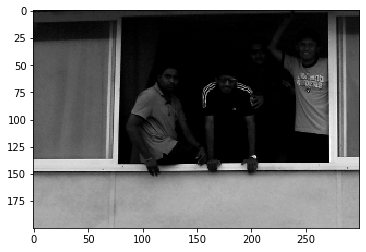

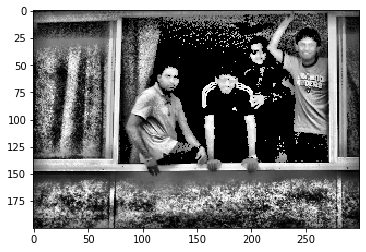

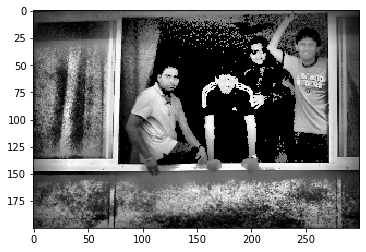

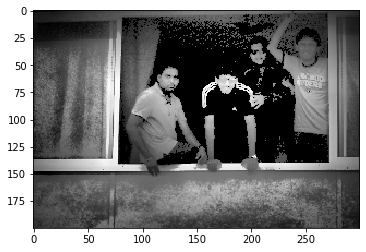

In [73]:
from imageio import imread
import numpy as np
import matplotlib.pyplot as plt

def AHE(im, win_size):
    contextual_regin = np.zeros((win_size, win_size))
    output = np.zeros(im.shape)
    for x in range(im.shape[0]):
        for y in range(im.shape[1]):
            rank = 0
            for i in range(-(win_size-1)//2, (win_size+1)//2):
                for j in range(-(win_size-1)//2, (win_size+1)//2):
                    if 0<=x+i and x+i < im.shape[0] and 0 <= y+j and y+j < im.shape[1] and im[x, y] > im[x+i, y+j]:
                        rank += 1
            output[x, y] = rank
    output = output*255/(win_size*win_size)
    return output


#Import image here
#Sample call
#Plotting code below
im = imread('beach.png')
plt.imshow(im[200:400, 200:500], cmap='gray')

plt.figure()
output1 = AHE(im[200:400, 200:500], 33)
plt.imshow(output1, cmap='gray')
plt.figure()
output2 = AHE(im[200:400, 200:500], 65)
plt.imshow(output2, cmap='gray')
plt.figure()
output3 = AHE(im[200:400, 200:500], 129)
plt.imshow(output3, cmap='gray')
plt.show()


## Conclusion

Have you accomplished all parts of your assignment? What concepts did you used or learned in this assignment? What difficulties have you encountered? Explain your result for each section. Please wirte one or two short paragraph in the below Markdown window (double click to edit).

**** Your Conclusion: ****

--
Problem 1: According to the requirements, four images are shown: image after smoothing, the original gradient magnitude image, the image after NMS, and the final edge image after thresholding and the thresholding is 120. The function is completed by following instructions step-by-step. Since the instructions are detailed, I didn't encounter any difficulties.

Problem 2: the pseudocode is given, so the funcition is not difficult to create. It takes a lot of time for the functions to give a result image, because for each pixel in a image, it needs to compare win_size * win_size times to get the rank. For window_size=169, it needs to compare 16,641 times to get one rank... It is super slow. So, I sliced out the middle of the image where there are four people.
According to my results, images with smaller window size are more qualitative. The faces of the people in the middle of the image are not dark in the shadow and the curtains are more clear when the window size is small.

---
** Submission Instructions**  
Remember to submit you pdf version of this notebook to Gradescope. You can find the export option at File $\rightarrow$ Download as $\rightarrow$ PDF via LaTeX

For problem 1, the NMS implementation is a bit odd, and the result seems off, the result should show a very thin edge line, since the NMS will filter out the redundants pixel for the detected edge and give a precise location.

For NMS, we only care about 8 pixels surrounding for each pixel, and the angle to these pixels are the multiple of 45, meaning 0, 45, 90, 135 ... 
You can first round your gradient angle to the multiple of 45, and compare pixels along the gradient direction.

In [ ]:
# For example:
def NMS(img, angle, mag):
    angle = angle * 180 / math.pi
    theta_round = np.round(angle / 45)*45
    h,w = img.shape
    img_res = np.zeros([h,w])
    for i in range(1,h-1):
        for j in range(1,w-1):
            if theta_round[i,j] == 0 or theta_round[i,j] == 180 or theta_round[i,j] == -180:
                if mag[i,j] <= mag[i,j-1]or mag[i,j]<= mag[i,j+1]:
                    mag[i,j] = 0;
            elif theta_round[i,j] == 45 or theta_round[i,j] == -135:
                if mag[i,j] <= mag[i-1,j+1] or mag[i,j]<= mag[i+1,j+1]:
                    mag[i,j] = 0;
            elif theta_round[i,j] == -45 or theta_round[i,j] == 135:
                if mag[i,j] <= mag[i+1,j+1]or mag[i,j]<= mag[i-1,j-1]:
                    mag[i,j] = 0;
            elif theta_round[i,j] == 90 or theta_round[i,j] == -90:
                if mag[i,j] <= mag[i-1,j]or mag[i,j]<= mag[i+1,j]:
                    mag[i,j] = 0;
    return mag

For problem 2, you result is correct, but the nested for loop takes a very long time to go through the image, especially when we test with a large kernel.
Similar to the previous assignment, the image shift function and the spatial method can help to reduce the run time.

In [ ]:
# For your reference, you can review the following:
def imshift(x, k, l):
    h = x.shape[0]
    w = x.shape[1]
    xshifted = np.zeros([h, w])
    ishifted = np.mod(np.arange(0, h) + k, h)
    jshifted = np.mod(np.arange(0, w) + l, w)
    xshifted = x[:, jshifted][ishifted, :]
    return xshifted

def AHE(im, win_size):
    s1=int(win_size/2)
    s2=int(win_size/2)
    rank=np.zeros((im.shape[0], im.shape[1]))
    for k in range (-s1, s1+1):
        tmp=np.zeros((im.shape[0], im.shape[1]))
        for l in range (-s2,s2+1):
            shift=imshift(im,-k,-l)
            tmp = im>shift
            rank+=tmp
    output =np.zeros((im.shape[0], im.shape[1]))
    output=rank*255/(s1*s2)
    return output